In [ ]:
! pip install -U langchain openai langchain-chroma langchain-experimental

In [ ]:
!pip install jq

# Load Data From JSON to Doc

In [2]:
import os
import json
from config import Config
from langchain_core.documents import Document

with open(f'../{Config.parsed_full_data_path}', 'r', encoding='utf-8') as f:
    articles = json.load(f)

output_dir = f'../{Config.text_dataset_path}'
os.makedirs(output_dir, exist_ok=True)

seen_titles = set()
docs = []

for article in articles:
    title = article.get('title')
    text = article.get('text')

    if (
        title is not None
        and text is not None
        and 'a message from' not in title.lower()
        and title not in seen_titles
    ):
        seen_titles.add(title)
        metadata = {
            "issue": article.get("issue"),
            "url": article.get("url"),
            "title": article.get("title"),
        }
        doc = Document(page_content=article.get('text'), metadata=metadata)
        docs.append(doc)



# Перевіряємо результат
print(docs[0].page_content)
print(docs[0].metadata)

Automatic license plate readers capture thousands of vehicle IDs each minute, allowing law enforcement and private businesses to track drivers with or without their explicit consent. Fashion-forward freedom fighters are countering the algorithms with a line of shirts, dresses, and tops covered with images of license plates.
What’s new:Security researcher and clothing designer Kate Rose unveiled her Adversarial Fashion line at the Defcon hacker convention. The garments are meant to foul automatic license plate readers by diluting their databases with noise.
How it works:Such readers typically use optical character recognition to capture lettering found in rectangular shapes they identify as license plates. But they aren’t picky about whether those rectangles are attached to a car.
• Rose used an open source reader to optimize her designs until they had shapes, sizes, and lettering that fooled the software.
• Each time a reader captures a plate from Rose’s clothes, it takes in a line of 

# Token Spliter

In [3]:
from langchain.text_splitter import TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size=800, 
                                  chunk_overlap=100)

In [4]:
docs_splited = text_splitter.split_documents(docs)

In [5]:
docs_splited[0]

Document(metadata={'issue': 1, 'url': 'https://www.deeplearning.ai/the-batch/issue-1/', 'title': 'This Shirt Hates Surveillance'}, page_content='Automatic license plate readers capture thousands of vehicle IDs each minute, allowing law enforcement and private businesses to track drivers with or without their explicit consent. Fashion-forward freedom fighters are countering the algorithms with a line of shirts, dresses, and tops covered with images of license plates.\nWhat’s new:Security researcher and clothing designer Kate Rose unveiled her Adversarial Fashion line at the Defcon hacker convention. The garments are meant to foul automatic license plate readers by diluting their databases with noise.\nHow it works:Such readers typically use optical character recognition to capture lettering found in rectangular shapes they identify as license plates. But they aren’t picky about whether those rectangles are attached to a car.\n• Rose used an open source reader to optimize her designs unt

# VectorStore

In [6]:
# ! pip install chromadb

In [7]:
import os


In [8]:
persist_directory = '../vdb/chroma/'

## Built Text Vector DB

In [9]:
import shutil

# Повністю видаляємо стару базу
shutil.rmtree(persist_directory)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../vdb/chroma/'

In [10]:
from langchain_experimental.open_clip import OpenCLIPEmbeddings

from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings

In [11]:
#!pip install -U :class:`~langchain-chroma
#!pip install -U langchain-huggingface

In [12]:
from langchain_chroma import Chroma

In [13]:
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2",
                                                   show_progress = True,
                                                   # truncate_dim=384, #todo check
                                                   encode_kwargs={'batch_size':256})
embedding_function = OpenCLIPEmbeddings(batch_size=256) #todo Перевірити

text_vectordb = Chroma.from_documents(
    collection_name="text_collection",
    documents=docs_splited, 
    persist_directory=persist_directory,
    embedding=embedding_function)

text_vectordb

C:\Users\Piter\AppData\Local\Temp\ipykernel_8880\1135534556.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2",
C:\Users\Piter\PycharmProjects\Multimodal_RAG_SoftServe\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
print(text_vectordb._collection.count())

870


In [15]:
question = "Give me some news about AI and Ukraine"
docs = text_vectordb.similarity_search(question,k=5)
len(docs)


5

In [16]:
docs[0]

Document(id='4bd87307-869c-4eac-86a8-71719a4e981e', metadata={'issue': 208, 'title': 'Ukraine’s Homegrown Drones', 'url': 'https://www.deeplearning.ai/the-batch/issue-208/'}, page_content='The war in Ukraine has spurred a new domestic industry.\nWhat’s new:Hundreds of drone companies have sprung up in Ukraine since Russian forces invaded the country early last year,The Washington Postreported.\nHow it works:Ukrainian drone startups are developing air- and sea-borne robots, which the country’s military use to monitor enemy positions, guide artillery strikes, and drop bombs, sometimes on Russian territory.\n• Quadcopters built by Twist Robotics use AI-powered target tracking to remain locked onto targets even if the operator loses radio contact. Air and naval drones from Warbirds have similar capabilities.\n• Working in an active war zone gives local drone makers advantages over their foreign counterparts. For instance, Ukrainian authorities give domestic firms access to captured Russian

In [38]:
docs[1]

Document(id='5d4e0a5e-9adf-4d4c-aae1-07816c889277', metadata={'issue': 89, 'title': 'The Coming Crackdown', 'url': 'https://www.deeplearning.ai/the-batch/issue-89/'}, page_content='The European Union proposed sweeping restrictions on AI technologies and applications.\nWhat’s new:The executive arm of the 27-nation EU publisheddraft rulesthat aim to regulate, and in some cases ban, a range of AI systems. The proposal is the first to advance broad controls on the technology by a major international body.\nWhat it says:The 100-plus page document divides AI systems into three tiers based on their level of risk. The definition of AI includes machine learning approaches, logic-based approaches including expert systems, and statistical methods.\n• The rules would forbid systems deemed to pose an “unacceptable” risk. These include real-time face recognition, algorithms that manipulate people via subliminal cues, and those that evaluate a person’s trustworthiness based on behavior or identity.\n

## Built Image`s Vector DB

In [39]:
dataset_folder=f"../{Config.image_dataset_path}"
dataset_folder

'../dataset/images'

In [40]:
ids = []
uris = []

for i, filename in enumerate(sorted(os.listdir(dataset_folder))):
    file_path = os.path.join(dataset_folder, filename)

    ids.append(str(i))
    uris.append(file_path)

print(ids[0])
uris[:2]

0


['../dataset/images\\issue_101_title_bye_bye_bots_img_0_openai.gif',
 '../dataset/images\\issue_101_title_listening_to_the_brain_img_0_brain-implant.gif']

In [41]:

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


In [44]:
# Image processing
print('Start Image Preprocessing')
photo_embedding_function = OpenCLIPEmbeddings(batch_size=256, device=device)

Start Image Preprocessing


In [46]:
image_metadata = [] #todo

In [45]:
image_vectordb = Chroma(
    collection_name="image_collection",
    persist_directory=persist_directory,
    embedding_function=photo_embedding_function)

In [47]:
# image_uris is a lis of image url, aka /data/image/image_1.jpeg
image_vectordb.add_images(
    uris=uris,
    metadata=image_metadata)

C:\Users\Piter\PycharmProjects\Multimodal_RAG_SoftServe\.venv\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


['6a3124cb-b5fc-49f4-8980-6bfe4c528d61',
 'fd5e3f2c-daaa-424a-869a-7ff8fa3d4f5e',
 '1b55ea83-8061-4631-897f-a66508b773a3',
 'f252faa3-5ff8-4a05-b6f2-3cfc84d5804e',
 '4ad7912a-0181-4bb4-96e9-91040013921e',
 'bc1e93a2-ae90-43e0-a961-b88de8d145e6',
 '9b5d65c6-a442-45cc-92ea-28d1df3c3aa9',
 '6af8ce2b-4974-489d-a410-c471d9fecdf2',
 '01d0de91-dcb5-4e6b-8742-58f337ceef38',
 '3b7a04b4-4e0e-4f49-8dec-37a406e5a321',
 '44332161-602a-440d-a453-ed6ace55c247',
 '827d51a1-8c82-4018-b183-ab987ba038d4',
 'ee2bf86e-9d39-4edf-becd-45e2d75f4180',
 '54962915-243a-40cf-a77d-98fa6c838291',
 '3e1111c0-66ac-4d8d-bc36-058a97c607e2',
 '48dddcdd-1391-4ed8-895c-64f776607e73',
 '482ce4db-358f-4219-a7f7-5dc1575f7522',
 'ed578de6-496f-475c-bd4a-e0bc2e61ac3e',
 '5abe92a5-8f00-429a-813b-78fdb5effad2',
 '1846c3cf-5ed1-4072-9732-65288e04b226',
 'cc290ef7-db4f-43c5-a02a-803b3d8cea37',
 '6bece03c-fa73-4c65-921d-77bac252d75f',
 '040d2f12-13f4-48cd-adbf-556ec1a3014a',
 '76073854-4846-411a-bd21-c9c1f7b91a66',
 '0b848011-675d-

In [59]:
# some test

question = "Give me some news about AI and chemistry"

In [60]:
from IPython.display import Image, display

# Створюємо ретривер
image_retriever = image_vectordb.as_retriever()

relevant_images = image_retriever.get_relevant_documents(question)

# Виводимо знайдені зображення
print(f"Found {len(relevant_images)} images for the query.\n")

for idx, doc in enumerate(relevant_images):
    uri = doc.metadata.get('uri', None)
    
    if uri and os.path.exists(uri):
        print(f"Result {idx + 1}: {uri}")
        display(Image(filename=uri, width=400))  # Відображаємо зображення розміром 400px
    else:
        print(f"Result {idx + 1}: Image not found or invalid URI.")

    print("-" * 50)

Found 4 images for the query.

Result 1: Image not found or invalid URI.
--------------------------------------------------
Result 2: Image not found or invalid URI.
--------------------------------------------------
Result 3: Image not found or invalid URI.
--------------------------------------------------
Result 4: Image not found or invalid URI.
--------------------------------------------------


Found 4 images for the query.

Result 1:


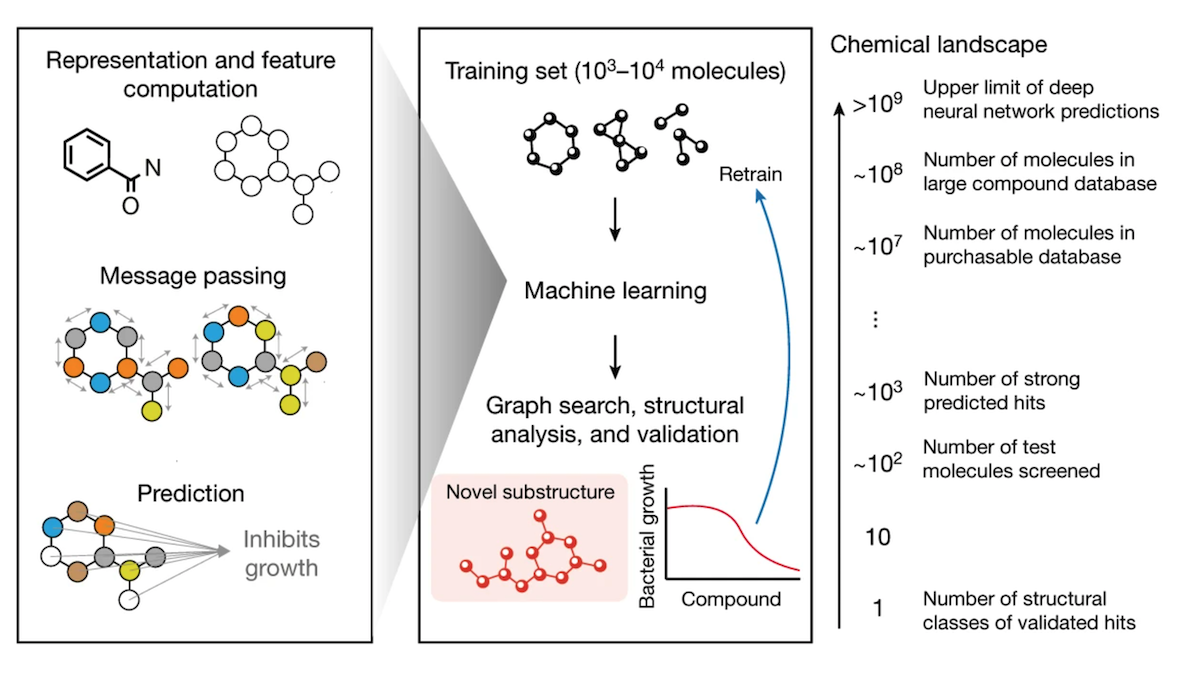

--------------------------------------------------
Result 2:


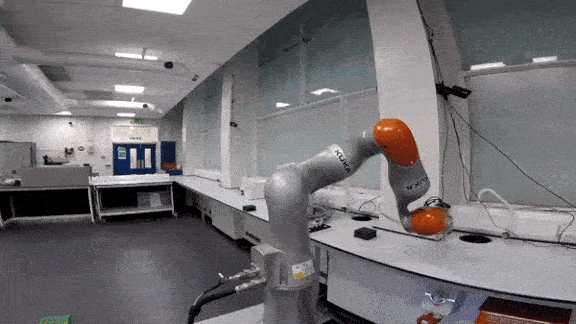

--------------------------------------------------
Result 3:


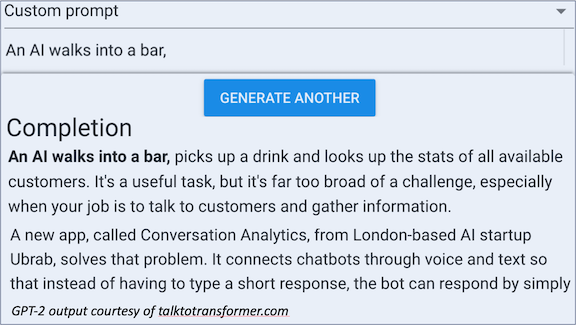

--------------------------------------------------
Result 4:


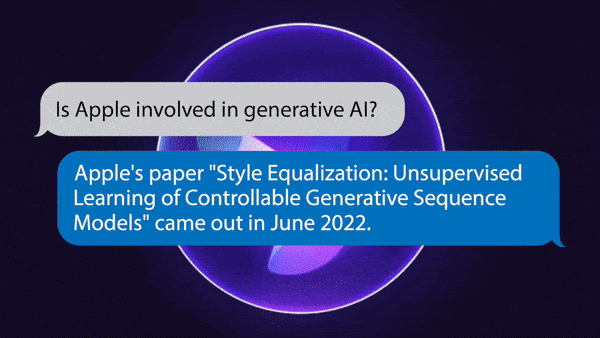

--------------------------------------------------


In [61]:
import base64
from IPython.display import Image, display
import io
from PIL import Image as PILImage

# Виводимо знайдені зображення
print(f"Found {len(relevant_images)} images for the query.\n")

for idx, doc in enumerate(relevant_images):
    # Отримуємо page_content, де збережене зображення
    img_bytes = base64.b64decode(doc.page_content)

    # Відкриваємо зображення через PIL
    image = PILImage.open(io.BytesIO(img_bytes))

    # Відображаємо
    print(f"Result {idx + 1}:")
    display(image)

    print("-" * 50)

# Similarity Search

In [96]:
question = "Give me some news about AI and airplanes"
docs = vectordb.similarity_search(question,k=3)
len(docs)
docs[0].page_content

In [97]:
len(docs)

3

In [98]:
docs[0].page_content

"An experimental AI system is helping train the next generation of fighter pilots.What’s new:The U.S. Air Force is using deep learning to evaluate the progress of around 50 pilots in one of its training squadrons,Popular Sciencereported.Cloud-based data:Built by the California startup Crowdbotics, the system harnesses data generated in flight by F-15E airplanes (or simulations). Each aircraft records numerous data streams, such as air speed and position, multiple times per second. Instructors use the system’s output to tailor feedback to each student.\n• The system grades trainees on their landings by monitoring the aircraft’s angle of approach, position on the runway, and remaining fuel. A plane that’s heavy with fuel may need to maintain a higher speed as it touches down than one that’s almost empty.\n• It compares a trainee’s performance across different flights to evaluate improvement over time. It also compares trainees within a group, helping instructors to home in on areas for i

In [99]:
ret = vectordb.as_retriever()

In [100]:
ret.invoke(question)

[Document(metadata={'issue': 142, 'title': 'Training Mission', 'url': 'https://www.deeplearning.ai/the-batch/issue-142/'}, page_content="An experimental AI system is helping train the next generation of fighter pilots.What’s new:The U.S. Air Force is using deep learning to evaluate the progress of around 50 pilots in one of its training squadrons,Popular Sciencereported.Cloud-based data:Built by the California startup Crowdbotics, the system harnesses data generated in flight by F-15E airplanes (or simulations). Each aircraft records numerous data streams, such as air speed and position, multiple times per second. Instructors use the system’s output to tailor feedback to each student.\n• The system grades trainees on their landings by monitoring the aircraft’s angle of approach, position on the runway, and remaining fuel. A plane that’s heavy with fuel may need to maintain a higher speed as it touches down than one that’s almost empty.\n• It compares a trainee’s performance across diff

# Load VDB for prod

In [3]:
from langchain_chroma import Chroma
from langchain_experimental.open_clip import OpenCLIPEmbeddings
persist_directory = '../vdb/chroma/'
collection_name = 'text_collection'


embedding_function = OpenCLIPEmbeddings(batch_size=256) #todo Перевірити

text_vectordb = Chroma(
    collection_name=collection_name,
    persist_directory=persist_directory,
    embedding_function=embedding_function
)

question = "Give me some news about AI and Ukraine"
docs = text_vectordb.similarity_search(question,k=5)
len(docs)



C:\Users\Piter\PycharmProjects\Multimodal_RAG_SoftServe\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


5

In [4]:
docs[0]

Document(id='30969000-b5fa-4cfd-b2b6-733fe9441d74', metadata={'issue': 208, 'title': 'Ukraine’s Homegrown Drones', 'url': 'https://www.deeplearning.ai/the-batch/issue-208/'}, page_content='The war in Ukraine has spurred a new domestic industry.\nWhat’s new:Hundreds of drone companies have sprung up in Ukraine since Russian forces invaded the country early last year,The Washington Postreported.\nHow it works:Ukrainian drone startups are developing air- and sea-borne robots, which the country’s military use to monitor enemy positions, guide artillery strikes, and drop bombs, sometimes on Russian territory.\n• Quadcopters built by Twist Robotics use AI-powered target tracking to remain locked onto targets even if the operator loses radio contact. Air and naval drones from Warbirds have similar capabilities.\n• Working in an active war zone gives local drone makers advantages over their foreign counterparts. For instance, Ukrainian authorities give domestic firms access to captured Russian

In [ ]:
import chromadb
from langchain_chroma import Chroma

embedding_function = OpenCLIPEmbeddings(batch_size=256) #todo Перевірити
persistent_client = chromadb.PersistentClient()
collection = persistent_client.get_or_create_collection("collection_name")

vector_store_from_client = Chroma(
    client=persistent_client,
    collection_name="collection_name",
    embedding_function=embeddings,
)


In [1]:
# test old method

In [1]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
import base64
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from config import Config

In [2]:
persist_directory = '../vdb/chroma/'
client = chromadb.PersistentClient(path=persist_directory)

In [5]:
# Load the same collection
from langchain_experimental.open_clip import OpenCLIPEmbeddings
embedding_function = OpenCLIPEmbeddings(batch_size=256) #todo Перевірити
text_collection = client.get_collection(name="text_collection",
                                        embedding_function = embedding_function)
print(text_collection)

C:\Users\Piter\PycharmProjects\Multimodal_RAG_SoftServe\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: Expected EmbeddingFunction.__call__ to have the following signature: odict_keys(['self', 'input']), got odict_keys(['args', 'kwargs'])
Please see https://docs.trychroma.com/guides/embeddings for details of the EmbeddingFunction interface.
Please note the recent change to the EmbeddingFunction interface: https://docs.trychroma.com/deployment/migration#migration-to-0.4.16---november-7,-2023 


In [4]:
question = "Give me some news about AI and Airplanes"

results = text_collection.query(
        query_texts=[question],
        n_results=5,
        include=['documents', 'distances']
    )

results

InvalidDimensionException: Embedding dimension 384 does not match collection dimensionality 1024

In [1]:
client

NameError: name 'client' is not defined

In [ ]:





image_loader = ImageLoader()
CLIP = OpenCLIPEmbeddingFunction()
image_collection = client.get_collection(name="image_collection",
                                                   embedding_function = CLIP,
                                                   data_loader = image_loader)
print(image_collection)
